In [2]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
df <- read_csv('netflix_titles.csv', col_names= TRUE, show_col_types=FALSE)

# Data Cleaning


In [4]:
head(df,3)

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NA,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."


From the few heading examples, cast, listed_in column has multiple value problem. Let find out is there more than 1 director on 1 film.

In [5]:
as.data.frame(sapply(df, class))

,"sapply(df, class)"
,<chr>
show_id,character
type,character
title,character
director,character
cast,character
country,character
date_added,character
release_year,numeric
rating,character


Change date_added into date datatype

In [6]:
df$date_added <- as.Date(df$date_added, format='%B %d, %Y')

In [7]:
glimpse(df)

Rows: 8,807
Columns: 12
$ show_id      <chr> "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s1…
$ type         <chr> "Movie", "TV Show", "TV Show", "TV Show", "TV Show", "TV …
$ title        <chr> "Dick Johnson Is Dead", "Blood & Water", "Ganglands", "Ja…
$ director     <chr> "Kirsten Johnson", NA, "Julien Leclercq", NA, NA, "Mike F…
$ cast         <chr> NA, "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Mola…
$ country      <chr> "United States", "South Africa", NA, NA, "India", NA, NA,…
$ date_added   <date> 2021-09-25, 2021-09-24, 2021-09-24, 2021-09-24, 2021-09-…
$ release_year <dbl> 2020, 2021, 2021, 2021, 2021, 2021, 2021, 1993, 2021, 202…
$ rating       <chr> "PG-13", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "TV-MA", "PG…
$ duration     <chr> "90 min", "2 Seasons", "1 Season", "1 Season", "2 Seasons…
$ listed_in    <chr> "Documentaries", "International TV Shows, TV Dramas, TV M…
$ description  <chr> "As her father nears the end of his life, filmmaker Kirst…


There are two type of film, TV/Show and Movie. The duration for each are measure by season and minute. So I will change into numeric data and split into season col and minute column

In [159]:
df %>% mutate(duration = str_extract(duration, "[A-Za-z]+"))%>% filter(grepl("S", duration)) %>% distinct(duration)

duration
<chr>
Seasons
Season


In [8]:
df1 <- df %>% drop_na(rating, duration, date_added) %>% mutate(season = duration) %>% rename(minute= duration) %>% 
mutate(minute = ifelse(grepl('min', minute), minute, NA)) %>%
mutate(season = ifelse(grepl('S', season), season, NA)) %>%
mutate(minute = parse_number(minute)) %>%
mutate(season = parse_number(season)) %>%
replace_na(list(minute=-1, season = -1, director = 'unknown', cast = 'unknown', country = 'unknown')) %>%
mutate(listed_in = str_trim(listed_in)) %>%
mutate(listed_in = str_replace_all(listed_in, 
c("' "= "",'TV' = "",' TV' = "", 'TV Shows' = "", 'Shows '= '', " Movies" = "", " Movies,"= "", " Shows" = '', "Docuseries"="Documentaries"))) %>%
mutate(listed_in = str_replace_all(listed_in, c(' , '= ', ')))

head(df1,1)


show_id,type,title,director,cast,country,date_added,release_year,rating,minute,listed_in,description,season
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",-1


In [153]:
write.csv(df1, 'result.csv', row.names=FALSE)

In the above code, I have split Duration into minute, and season(refill Na with -1). For director, cast and country, I refilled with unknown, I also drop_na value for Na in rating, duration and date_added since the number of na <10.
In the listed_in column. Many genre are label incorrectly. For example, Drama TV Show and Drama Movies, TV Drama, ect.
So I will change all of these value into 1 format.

Analysis missing data

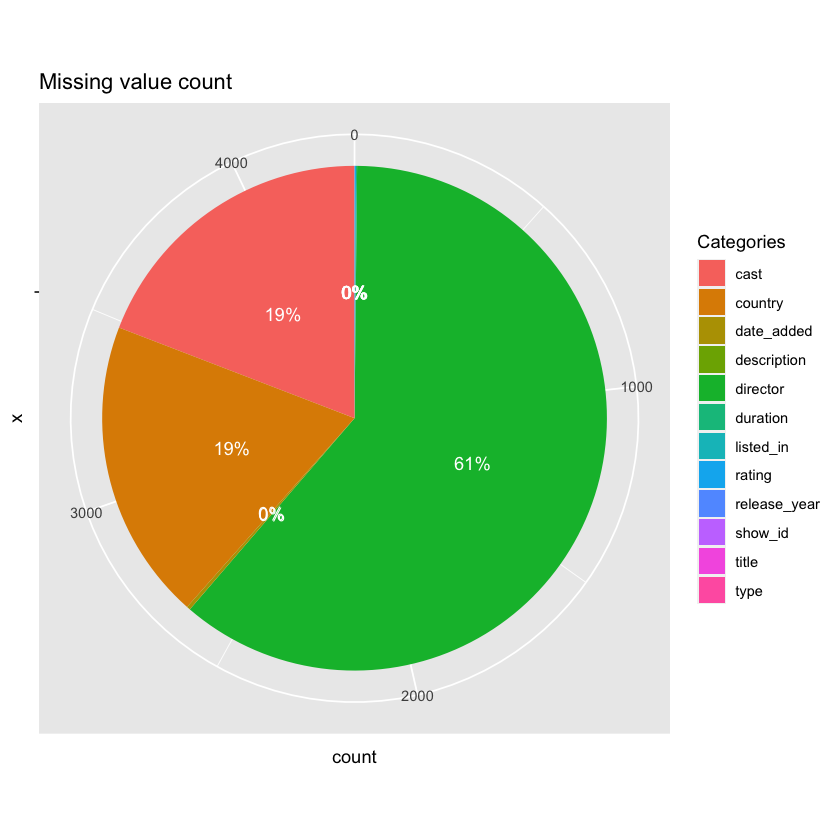

In [309]:
df %>% summarise_all(~sum(is.na(.))) %>% gather(key='column', value='count') %>% 
mutate(percen = paste0(round((count / sum(count))*100), "%")) %>%
ggplot(aes(x="", y=count, fill=column)) +
geom_bar(stat= 'identity', width=1) + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='white') + 
labs(fill= 'Categories', title='Missing value count') 

In [274]:
df_miss

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,2634,825,831,10,0,4,3,0,0


### After cleaning

In [276]:
miss_val <- map(df1,~sum(is.na(.)))
df_miss <- as.data.frame(miss_val)
df_miss

show_id,type,title,director,cast,country,date_added,release_year,rating,minute,listed_in,description,season
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0


# Analysis

## Exploratory Analysis
In this section, I will analysis pattern, trand, relationship through charts to gain insigh the data

### Type column

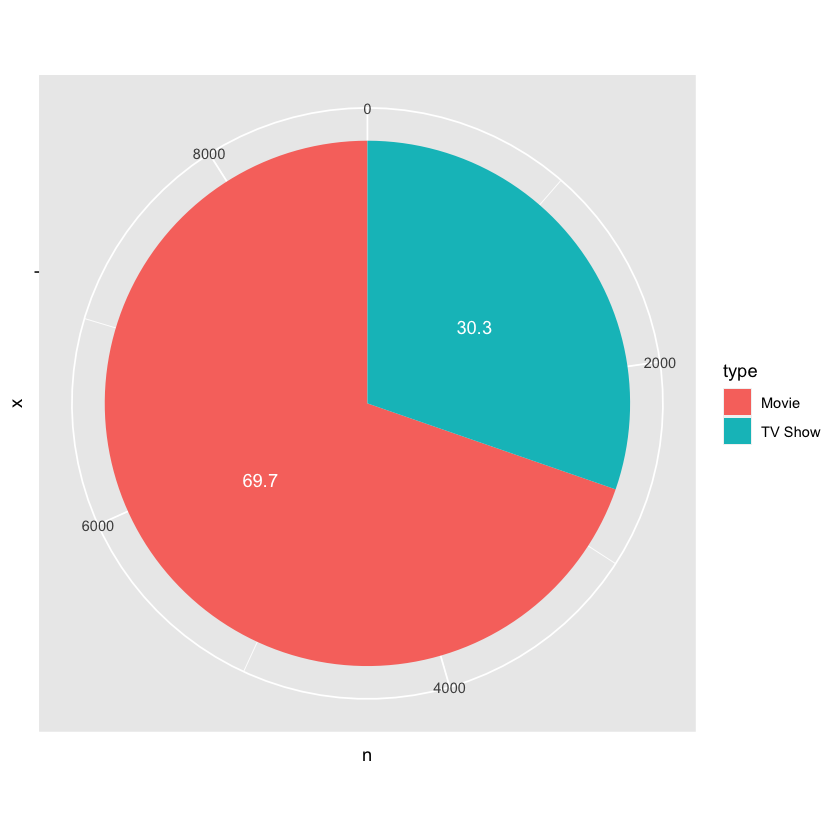

In [338]:
df1 %>% select(type) %>% count(type) %>% mutate(percen = round(n/sum(n),3)*100) %>% ggplot(aes(x='', y=n, fill=type)) +
geom_bar(stat='identity') + coord_polar('y',start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='white')

It is obvious that number of  Movie larger than TV show. The question is why people tend to make film rather than TV/ Show

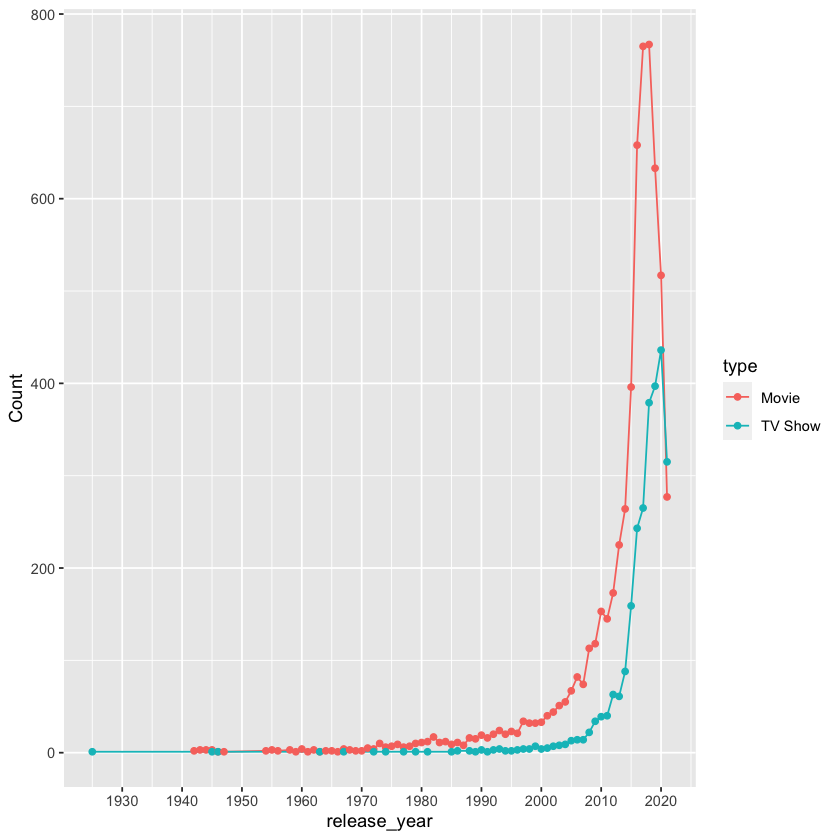

In [367]:
df_type <- df1 %>% select(type, release_year) %>% group_by(release_year, type) %>% summarise(Count = n(), .groups='drop')
df_type %>% ggplot(aes(x=release_year, y=Count, color=type)) + geom_line() + geom_point() +
scale_x_continuous(breaks=seq(1900, 2030, 10))

The trend of making film start in about 2000s. When the world step into digital era. Intertingly, the first film was belong to TV Show(1925). The bomming really start after 2010. The first movie was made at 1942. After that TV/show is not produced regularly. In contrast, Movie was made 2-3 movie each year. The reason for that is Movie was easier to make than TV/Show since the time taken to film and make script is shorter.

Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text()`).”


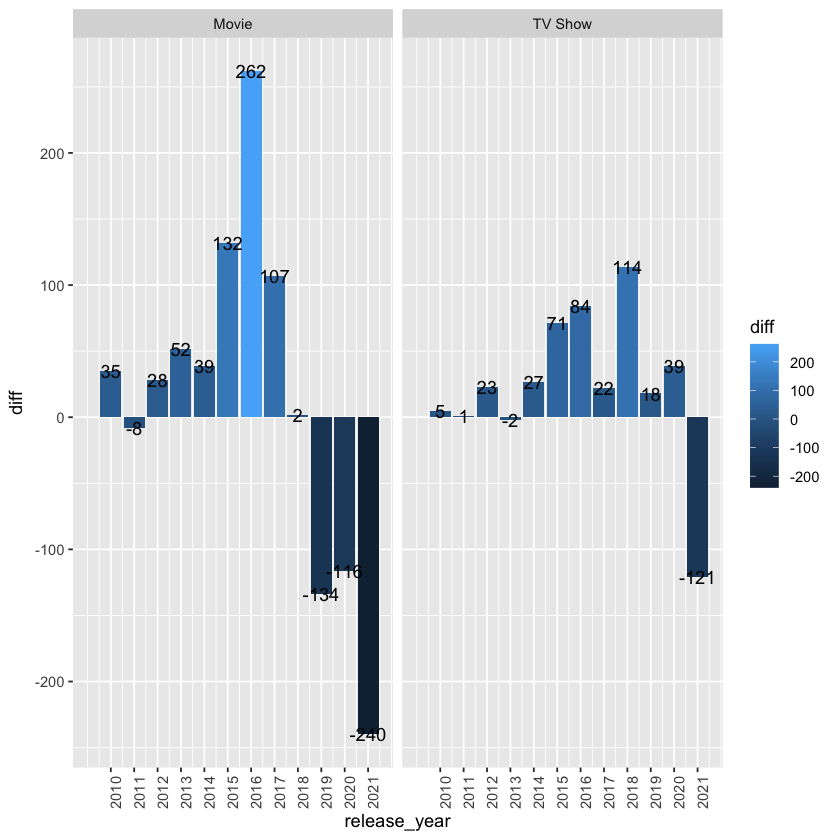

In [411]:
df_movie_diff <- df_type %>% filter(release_year >=2009 & type == "Movie") %>% mutate(diff = c(NA,diff(Count))) 
df_show_diff <- df_type %>% filter(release_year >=2009 & type == "TV Show") %>% mutate(diff = c(NA,diff(Count))) 
df_total <- rbind(df_movie_diff, df_show_diff)
df_total %>% 
ggplot(aes(x=release_year, y=diff, fill=diff)) +geom_bar(stat='identity')+
facet_wrap(~type) +
scale_x_continuous(breaks=seq(2010, max(df_type$release_year),1)) + 
geom_text(aes(label=diff)) + theme(axis.text.x = element_text(angle=90))

The trend of making movie start from 2016. When there are 262 movies made in just 1 year. The trend soon decrease in just 1 year later. In the year 2018, TV/show the number of film made larger than Movie. From the years 2018 to 2021, both Movies and TV/show quantity was decreased badly due to Covid-19, especially in the year 2021. 

In conclusion, I thinks the growth of movie is the benefit it got is larger than when investing to TV/show.
But later on 2018. Audience tend to prefer tv/show because of many reasons but I think the most impact ones is the flow of story.

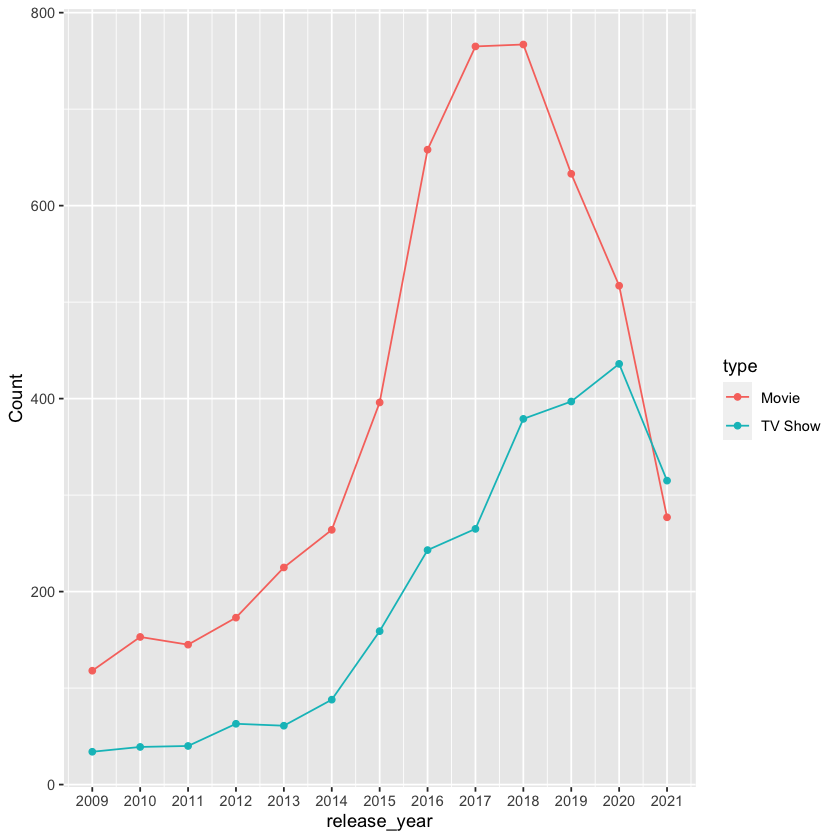

In [426]:
df_type %>% filter(release_year >=2009) %>% 
ggplot(aes(x=release_year, y=Count, color=type)) + geom_line() + geom_point() + 
scale_x_continuous(breaks=seq(2009, 2029,1))

In [427]:
df1

show_id,type,title,director,cast,country,date_added,release_year,rating,minute,listed_in,description,season
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",-1
s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,2021-09-24,2021,TV-MA,-1,"International, Dramas, Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",2
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",unknown,2021-09-24,2021,TV-MA,-1,"Crime, International, Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",1
s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,-1,"Documentaries, Reality","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",1
s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,-1,"International, Romantic, Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",2
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",unknown,2021-09-24,2021,TV-MA,-1,"Dramas, Horror, Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.",1
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",unknown,2021-09-24,2021,PG,91,Children & Family,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it.",-1
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent, International","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.",-1
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood",United Kingdom,2021-09-24,2021,TV-14,-1,"British, Reality","A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of being named the U.K.'s best.",9


### Country column

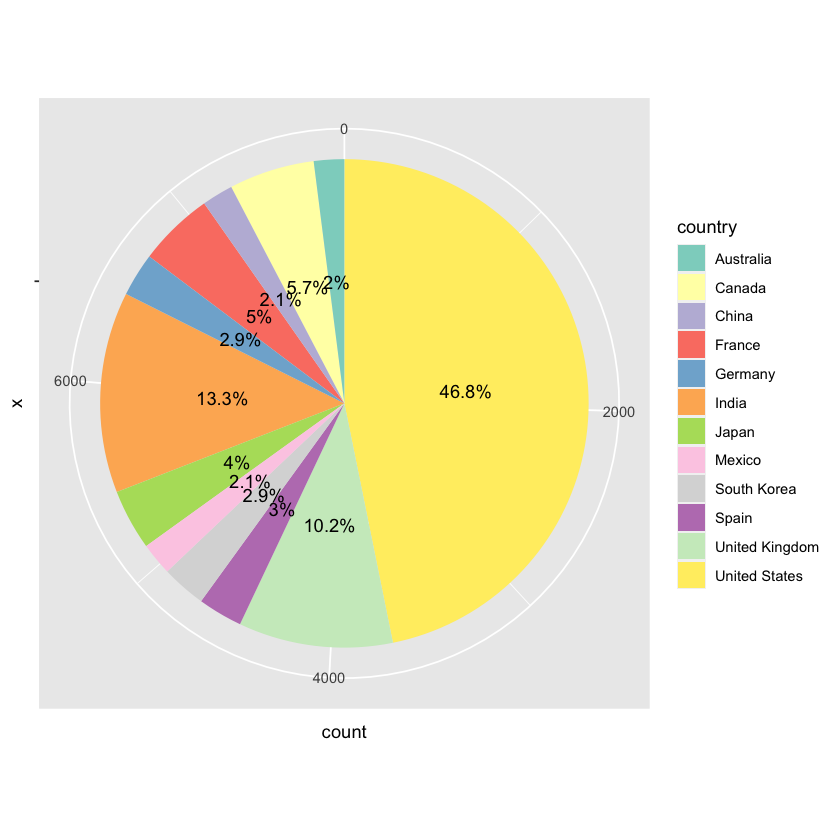

In [11]:
df1 %>% select(country) %>%filter(country !='unknown') %>% separate_rows(country, sep=', ') %>% group_by(country) %>% summarise(count = n())%>%
arrange(desc(count)) %>% mutate(country = fct_infreq(country)) %>% slice(1:12) %>% mutate(percen = paste0(round(count/sum(count),3)*100,"%")) %>%
ggplot(aes(x='', y=count, fill=country)) + 
geom_bar(stat='identity') + coord_polar('y', start=0) + geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3")


Most film are produced by United States, followed by India, and United Kingdom. The reason why United State have many film is their advanced technology and collaboration.

In [24]:
d <- df1 %>% select(country) %>%filter(country !='unknown') %>% separate_rows(country, sep=', ') %>% group_by(country) %>% summarise(count = n())%>%
arrange(desc(count)) %>% slice(1:12) 
paste(d$country, collapse = ", ")

[1] "United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany, Mexico, China, Australia"

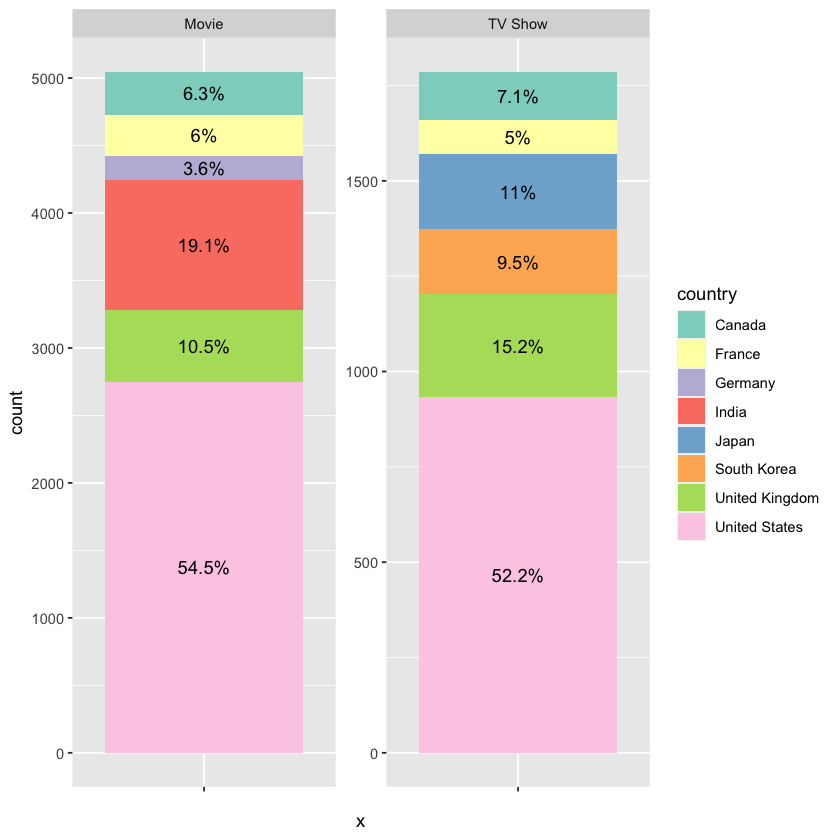

In [121]:
(df1 %>%filter(country !='unknown') %>% separate_rows(country, sep=', ') %>%
mutate(country = trimws(country)) %>%
group_by(country, type) %>% summarise(count = n(),.groups='drop')) %>% group_by(type) %>% top_n(6, count) %>%
mutate(percen = paste0(round(count/sum(count),3)*100,"%")) %>%
ggplot(aes(x='', y=count, fill=country)) + 
geom_bar(stat='identity') +geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3") + facet_wrap(~type, scales='free_y')


# %>%
# arrange(desc(count)) %>% slice(1:10) %>% mutate(percen = paste0(round(count/sum(count),3)*100,"%")) %>%
# ggplot(aes(x='', y=count, fill=country)) + 
# geom_bar(stat='identity') + coord_polar('y', start=0) + geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
# scale_fill_brewer(palette = "Set3")

This graph show top countries that contributed to Movie/TV-Shows industry. Overall, US has the largest propotions in both movie and tvshow, given by ~53%. It was followed by Inida in Movie industry and UK in TV-Shows.

The asia countries such as Japan and South Korea tend to make tv-shows rather than movies.

The number of film that collaborated >=2 countries:

In [535]:
df_colab <- df1 %>% select(country) %>% filter(country!='unknown') %>% mutate(is_colab = ifelse((str_count(country, ",") == 0), 'No_colab', 'Colab')) 
df_colab %>% group_by(is_colab) %>% summarise(count = n()) %>% mutate(percen = paste0(round((count/sum(count))*100,0), "%"))

is_colab,count,percen
<chr>,<int>,<chr>
Colab,1320,17%
No_colab,6641,83%


There are 17% film which made by >=2 country

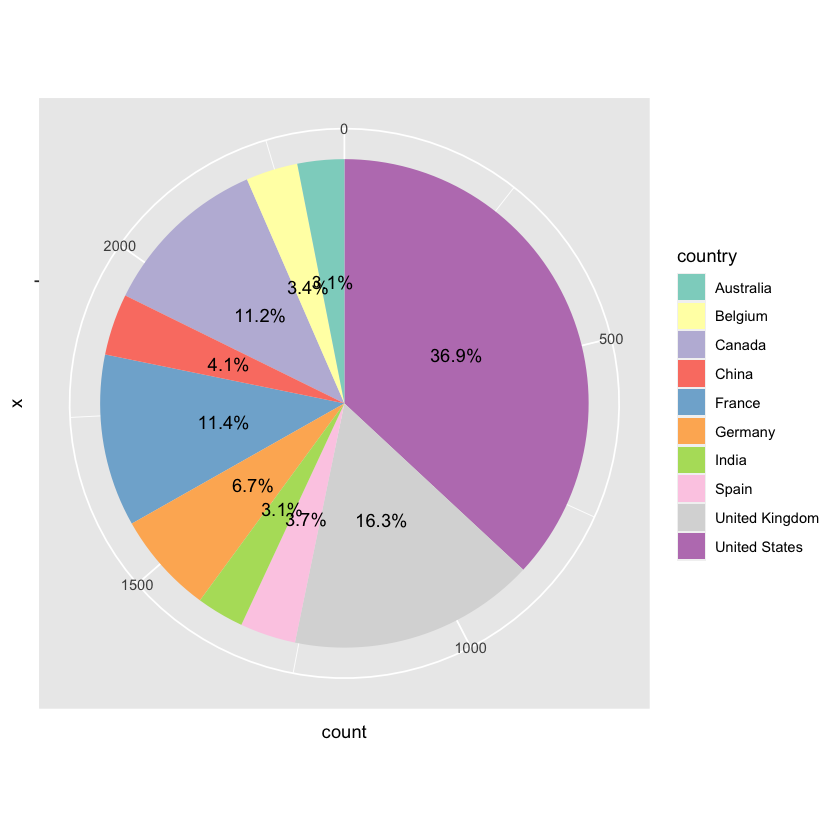

In [530]:
df1 %>% select(country) %>% filter(str_count(country, ",") >= 1 & country != 'unknown') %>% separate_rows(country, sep=', ') %>% group_by(country) %>% summarise(count = n())%>%
arrange(desc(count)) %>% slice(1:10) %>% mutate(percen = paste0(round(count/sum(count),3)*100,"%")) %>%
ggplot(aes(x='', y=count, fill=country)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3")

This graph show in the total of colaboration films, which countries have the most collaboration.As you can see, US consume ~37%, followed by UK.

In [567]:
df_colab %>% separate_rows(country, sep=', | ,| , ') %>% group_by(country, is_colab) %>% summarise(count = n(), .groups='drop') %>%
filter(country=="United States") %>% mutate(percen = paste0(round(count/sum(count),3)*100,"%"))

country,is_colab,count,percen
<chr>,<chr>,<int>,<chr>
United States,Colab,871,23.7%
United States,No_colab,2809,76.3%


In the total of US film, there are 23.7% of their film were colaborated.

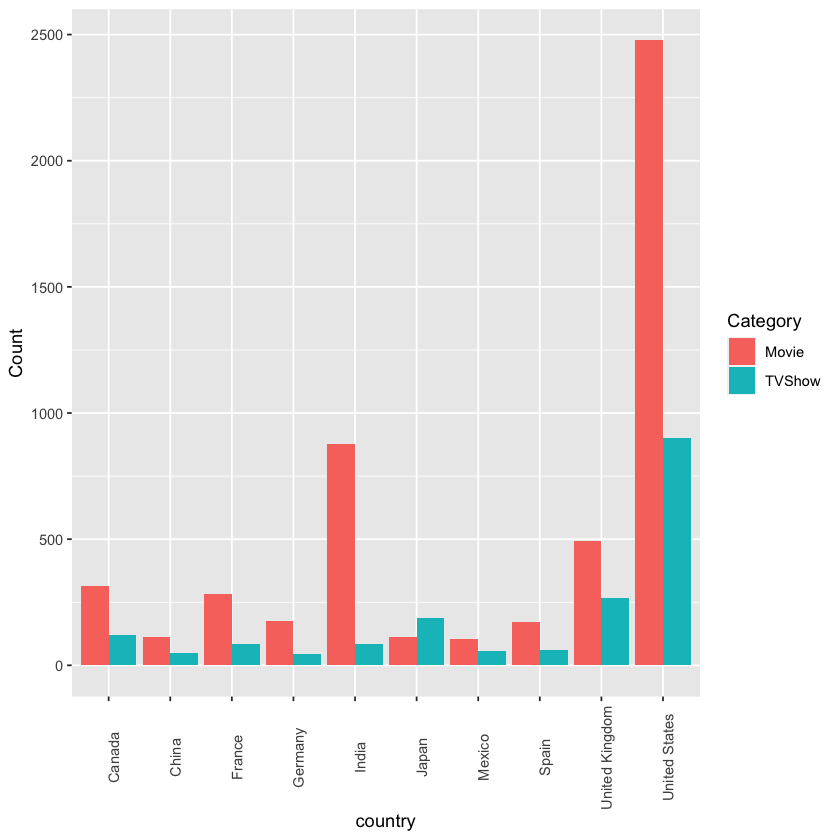

In [863]:
df1_country <- df1 %>% select(country, type, release_year) %>% filter(country !='unknown' & release_year >=2000) %>% separate_rows(country, sep=', ') %>% 
group_by(country, type) %>%
summarise(count=n(), .groups='drop')
df_pivot <- df1_country %>% mutate(type = str_replace_all(type,c('TV Show'='TVShow'))) %>%
pivot_wider(names_from = type, values_from = count, values_fill = 0) 
df_pivot %>% arrange(desc(Movie), desc(TVShow)) %>% slice(1:10) %>%
gather(key = "Category", value = "Count", Movie, TVShow) %>% 
ggplot(aes(x=country, y=Count, fill=Category)) + geom_bar(stat='identity', position= 'dodge')+ theme(axis.text.x = element_text(angle=90))


Most countries have the number of movie larger than the number of TVShow

Country where number of TVShow > (Movie +-10)

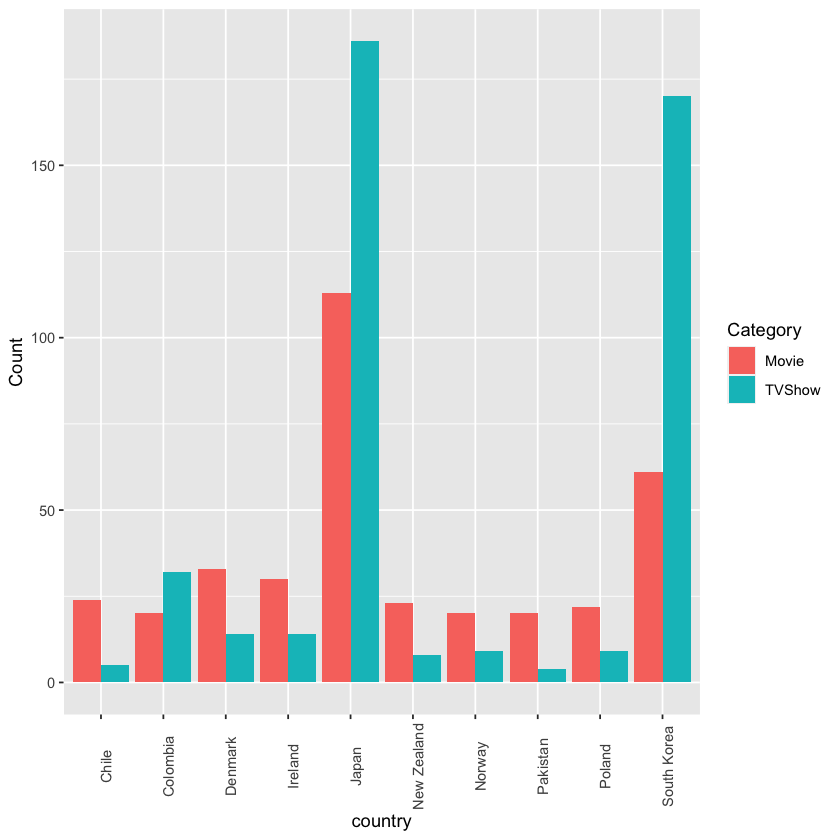

In [867]:
df_pivot %>% filter(TVShow >(Movie - 20) & TVShow !=0) %>% arrange(desc(Movie), desc(TVShow)) %>% slice(1:10) %>%
gather(key = "Category", value = "Count", Movie, TVShow) %>% 
ggplot(aes(x=country, y=Count, fill=Category)) + geom_bar(stat='identity', position='dodge') + theme(axis.text.x = element_text(angle=90))

From this chart, Japan, South Korea and Taiwan which produce most TVShow. It also note that Anime and Romance film tend to make in the form of TV_shows. The y_axis is ranging from 0 to 300, much lower than the number of movies

### Listed_in column

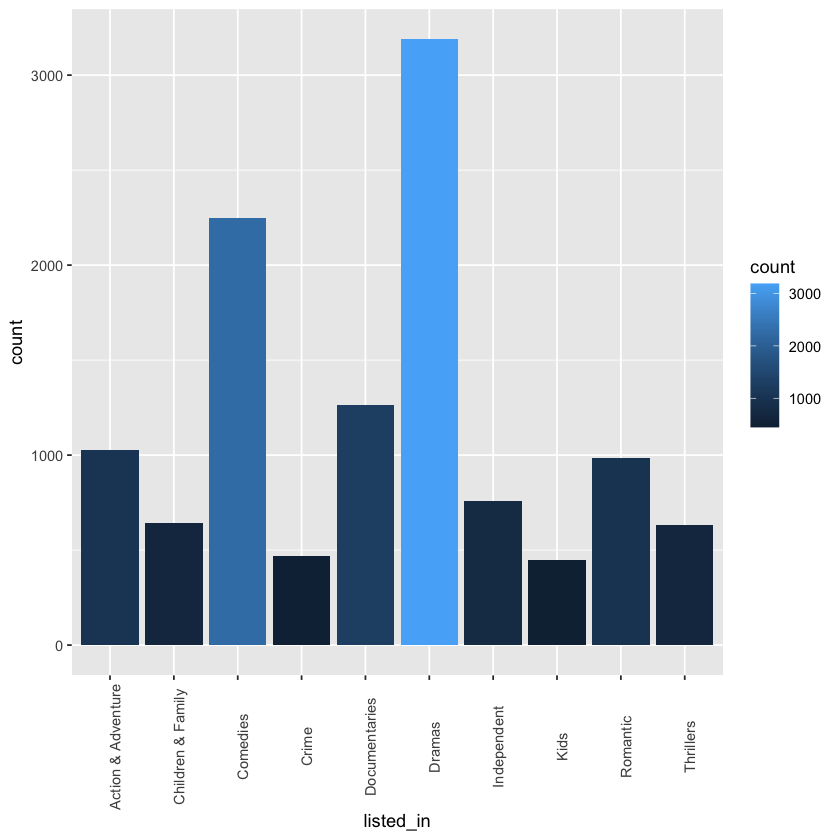

In [122]:
df1 %>% separate_rows(listed_in, sep=', ') %>% mutate(listed_in = trimws(listed_in)) %>% group_by(listed_in) %>%
filter(listed_in !='International') %>%
summarise(count = n()) %>% arrange(desc(count)) %>% slice(1:10) %>%
ggplot(aes(x=listed_in, y=count, fill=count)) + geom_bar(stat='identity') + theme(axis.text.x = element_text(angle=90))

In [716]:
top_list <- df1 %>% mutate(listed_in = trimws(listed_in)) %>% separate_rows(listed_in, sep=', ') %>% group_by(listed_in) %>%
summarise(count = n()) %>% arrange(desc(count)) %>% slice(1:10) %>% select(listed_in)

In [125]:
top_c <- df1 %>% mutate(country = trimws(country)) %>% 
separate_rows(country, sep=', ') %>%
group_by(country) %>%
filter(country!='unknown') %>%
summarise(count = n()) %>% arrange(desc(count)) %>% slice(1:5)

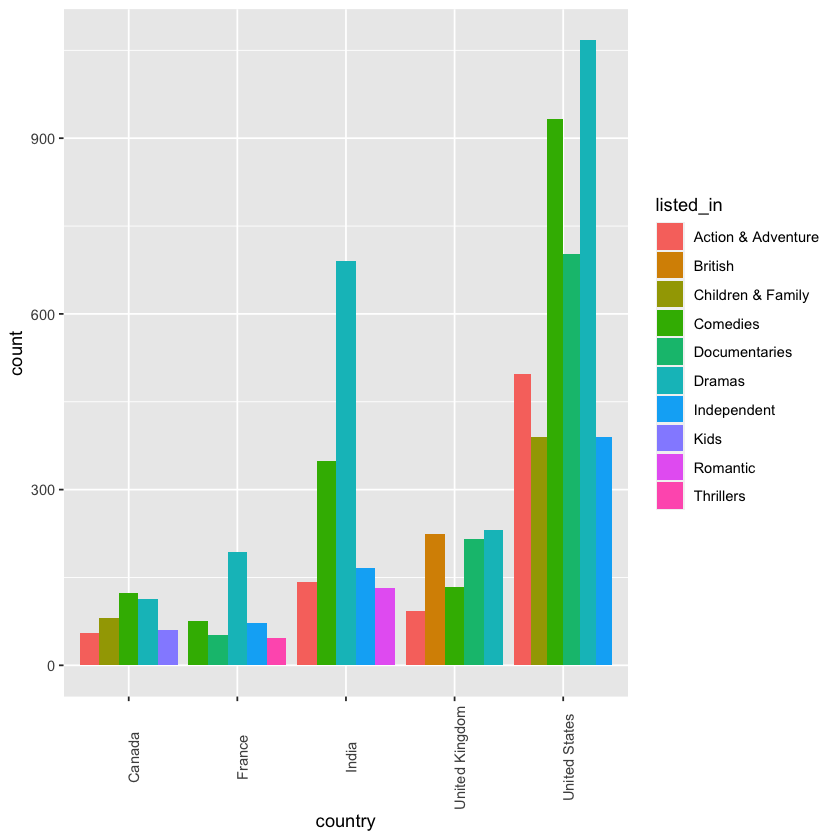

In [126]:
df_genre_c <-(df1 %>% separate_rows(listed_in, sep=', ') %>% 
mutate(listed_in = trimws(listed_in)) %>%
separate_rows(country, sep=', ') %>%
mutate(country = trimws(country)) %>%
group_by(listed_in, country) %>%
summarise(count = n(), .groups='drop')%>%  arrange(desc(count)))%>% filter(listed_in!='International')  %>% group_by(country) %>% top_n(5, count) 
df_genre_c %>% filter(country %in% top_c$country & country!='unknown') %>% 
ggplot(aes(country, count, fill=listed_in)) + geom_bar(stat='identity', position='dodge')+
theme(axis.text.x = element_text(angle=90))


# %>%
# ggplot(aes(x=country, y=count, fill=listed_in)) + geom_bar(stat='identity') + theme(axis.text.x = element_text(angle=90))

In [147]:
df_genre_c %>% filter(listed_in!='International' & listed_in=="Documentaries" & country!="unknown") %>% group_by(country, listed_in) %>% 
top_n(5,count) 

listed_in,country,count
<chr>,<chr>,<int>
Documentaries,United States,702
Documentaries,United Kingdom,216
Documentaries,France,51
Documentaries,Spain,30
Documentaries,Germany,29
Documentaries,Australia,26
Documentaries,Italy,19
Documentaries,Brazil,18
Documentaries,Argentina,12


The countries that producing most Documentaries film are United States, United Kingdom.

There is no clear what exactly is International movie. From netflix, page, I found "International Movies
Great stories can come from anywhere. Here you'll find all kinds of films from all around the globe, including dramas, comedies, thrillers, romance, action and more." Because of that, I will remove this value

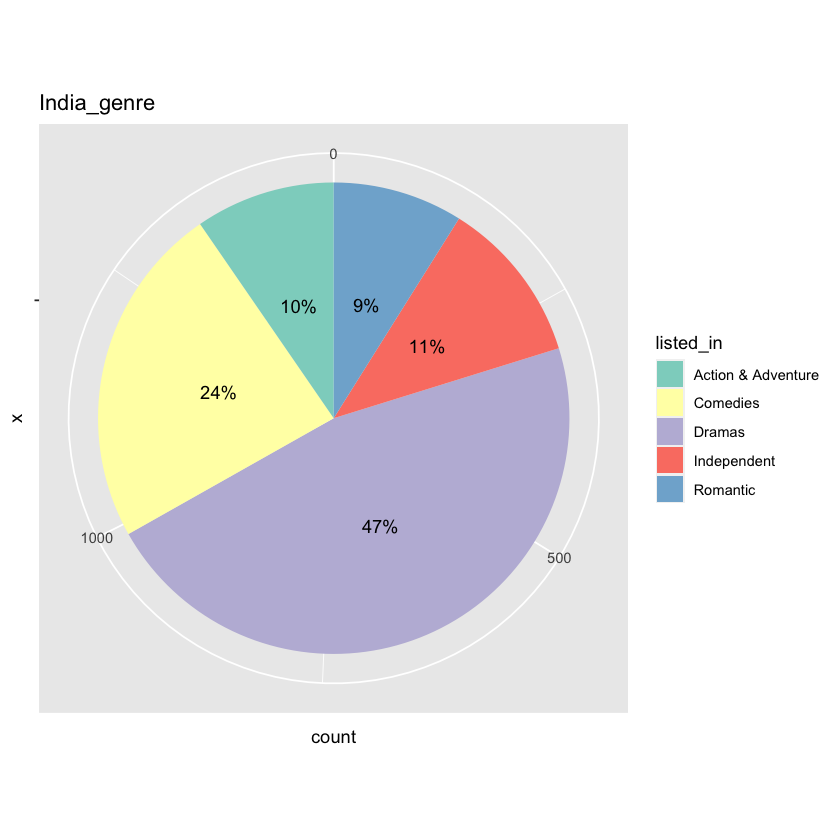

In [782]:
df_genre_c %>% filter(country == "India") %>% mutate(percen = paste0(round(count*100/sum(count),0),'%')) %>% 
ggplot(aes(x='', y=count, fill=listed_in)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3") + labs(title='India_genre')

In India, Drama movie is most favorite type. Followed by Comedies and Independent

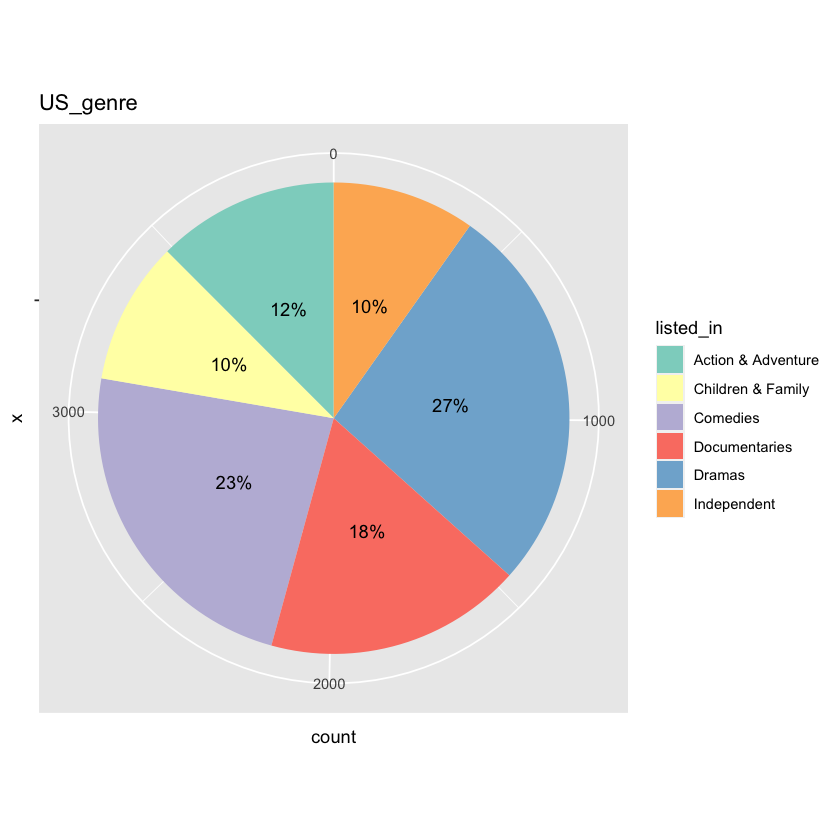

In [783]:
df_genre_c %>% filter(country=='United States') %>% mutate(percen = paste0(round(count*100/sum(count),0),'%')) %>% 
ggplot(aes(x='', y=count, fill=listed_in)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3") + labs(title='US_genre')

In USA, the distribution is more uniformly. There are film type for all range of age. Despite of educational film type like Documentary. It also follow the trend of making entertaining movie like Comedies and Drama

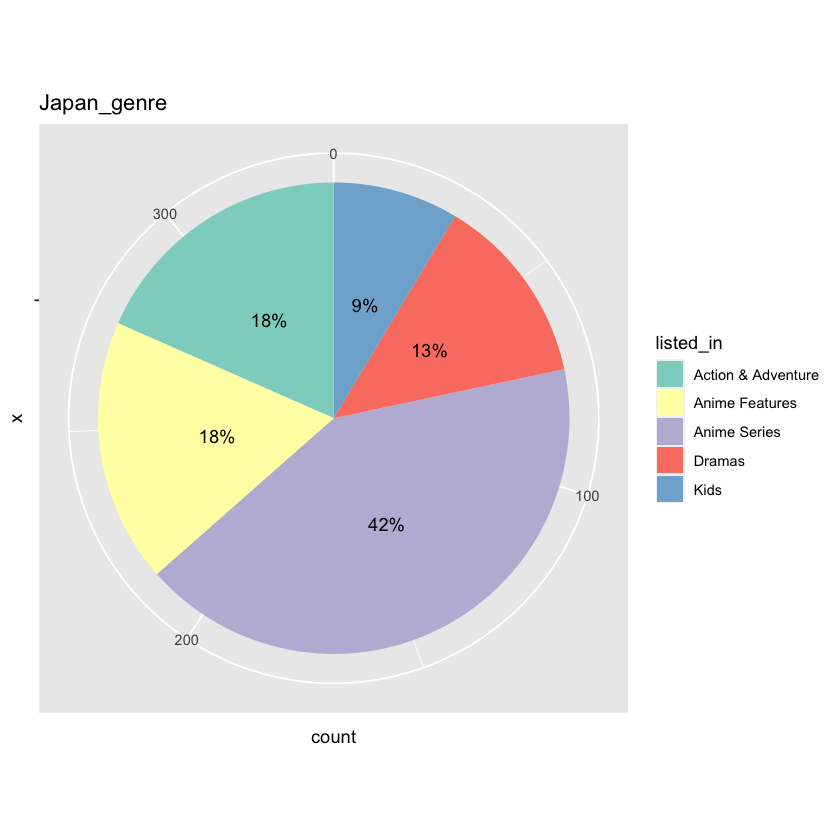

In [784]:
df_genre_c %>% filter(country=='Japan') %>% mutate(percen = paste0(round(count*100/sum(count),0),'%')) %>% 
ggplot(aes(x='', y=count, fill=listed_in)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3") + labs(title='Japan_genre')

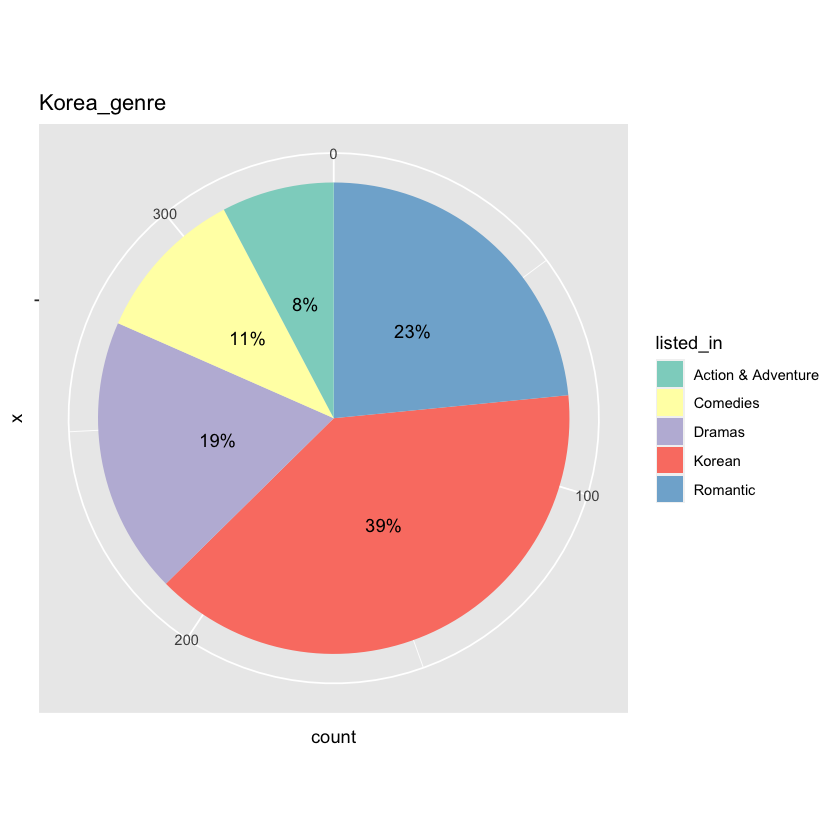

In [785]:
df_genre_c %>% filter(country=='South Korea') %>% mutate(percen = paste0(round(count*100/sum(count),0),'%')) %>% 
ggplot(aes(x='', y=count, fill=listed_in)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
scale_fill_brewer(palette = "Set3") + labs(title='Korea_genre')

In Asia countries. The trend of making Drama and Comedies and A&A movie is also present. In Japan, they tend to make film for children and maybe adult (Anime and kids). In constrast, Korean prefer watching Romantic movie.

### The trend of genre over time

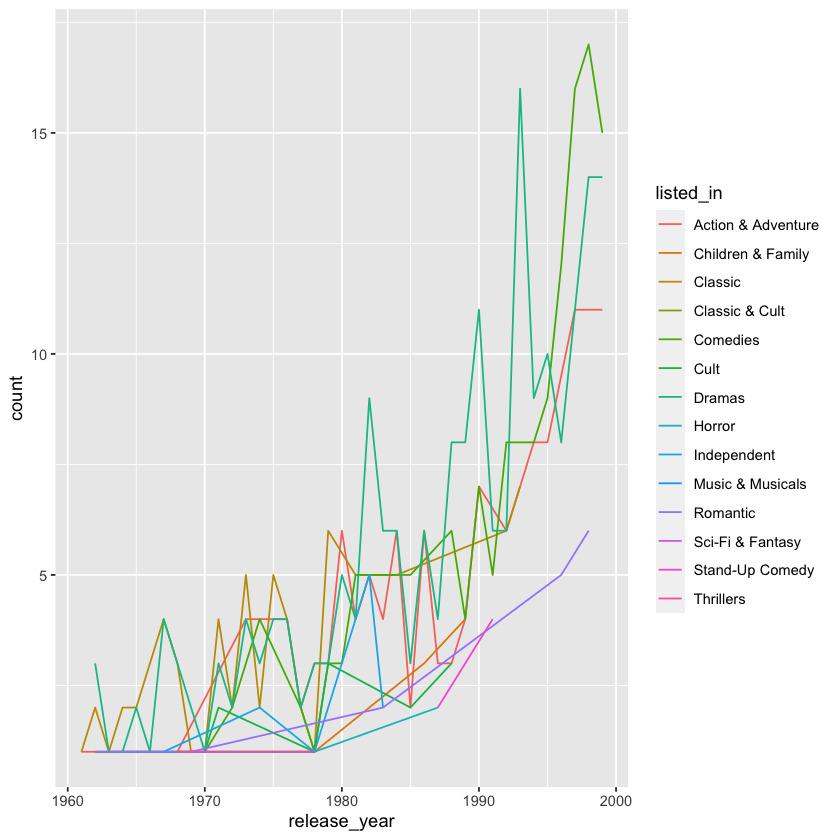

In [859]:
(df1 %>% separate_rows(listed_in, sep=', ') %>% 
mutate(listed_in = trimws(listed_in)) %>% filter(listed_in !='International' & release_year >1960 &release_year <2000)%>%
group_by(listed_in, release_year)%>%
summarise(count = n(), .groups='drop')) %>% group_by(release_year) %>% top_n(3, count) %>%
ggplot(aes(x=release_year, y=count, color=listed_in)) + geom_line()

From 1950 to 2000, there are not many data to include anything!

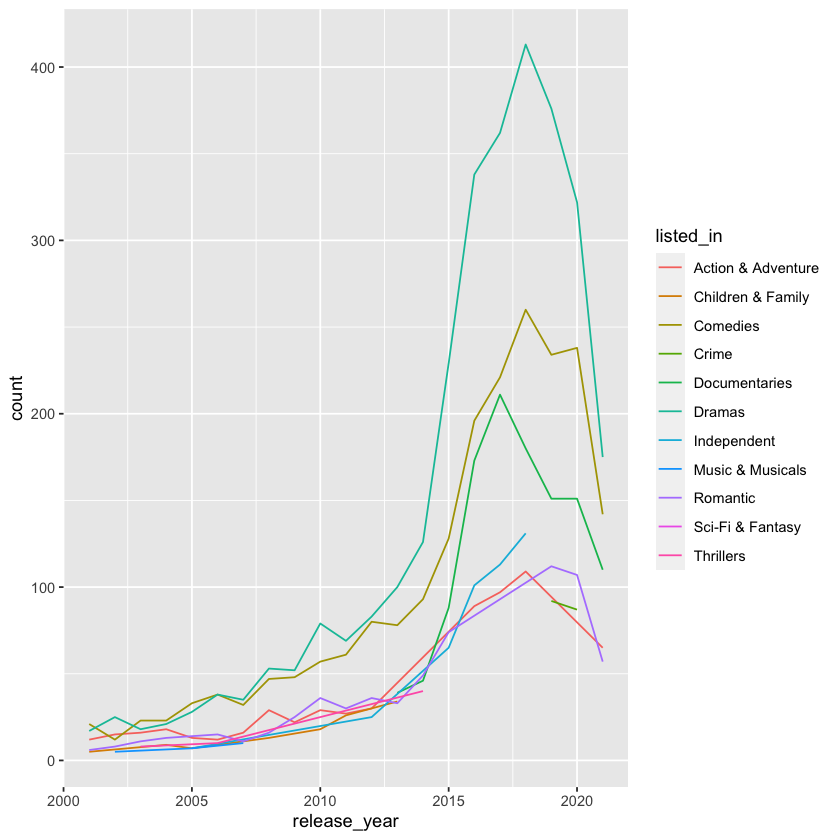

In [862]:
(df1 %>% separate_rows(listed_in, sep=', ') %>% 
mutate(listed_in = trimws(listed_in)) %>% filter(listed_in !='International' & release_year >2000)%>%
group_by(listed_in, release_year)%>%
summarise(count = n(), .groups='drop')) %>% group_by(release_year) %>% top_n(5, count) %>%
ggplot(aes(x=release_year, y=count, color=listed_in)) + geom_line()

## year different between release year and added_year

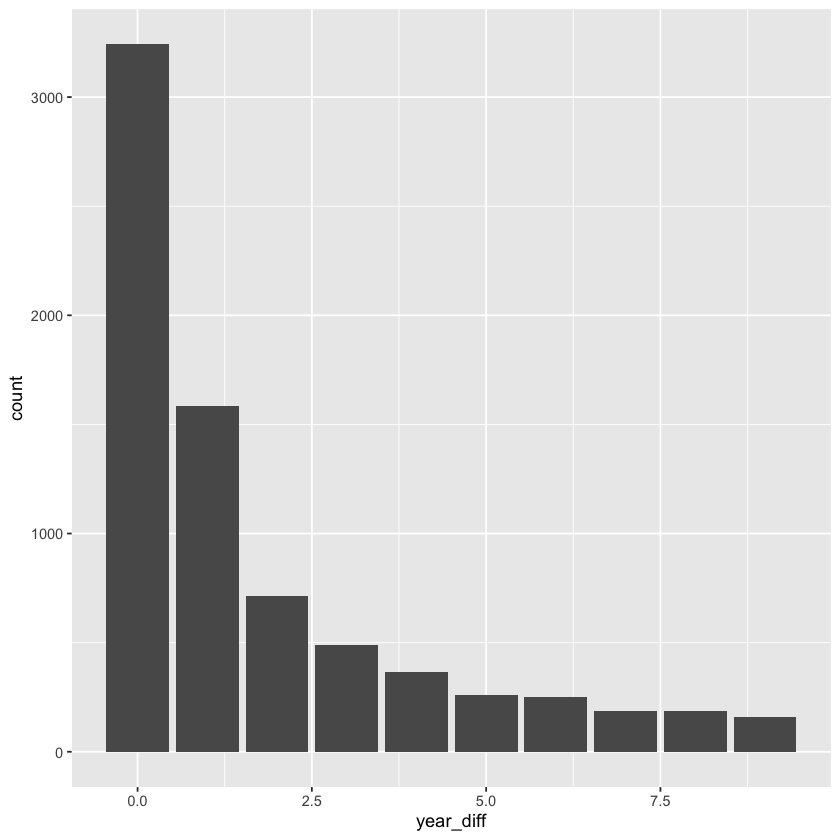

In [50]:
df_clean %>% mutate(year_diff = year(date_added) - release_year) %>% select(date_added, release_year, year_diff) %>%
group_by(year_diff) %>% summarise(count = n()) %>%
arrange(desc(count)) %>% slice(1:10) %>%
ggplot(mapping= aes(x=year_diff, y=count)) + geom_bar(stat='identity')

from the plot, you can see that movie/tv shows release and added time mostly are in the same time

## Rating by type, which rating have the most film

In [805]:
r <- df1 %>% group_by(rating) %>%summarise(count = n()) %>% filter(count >100)

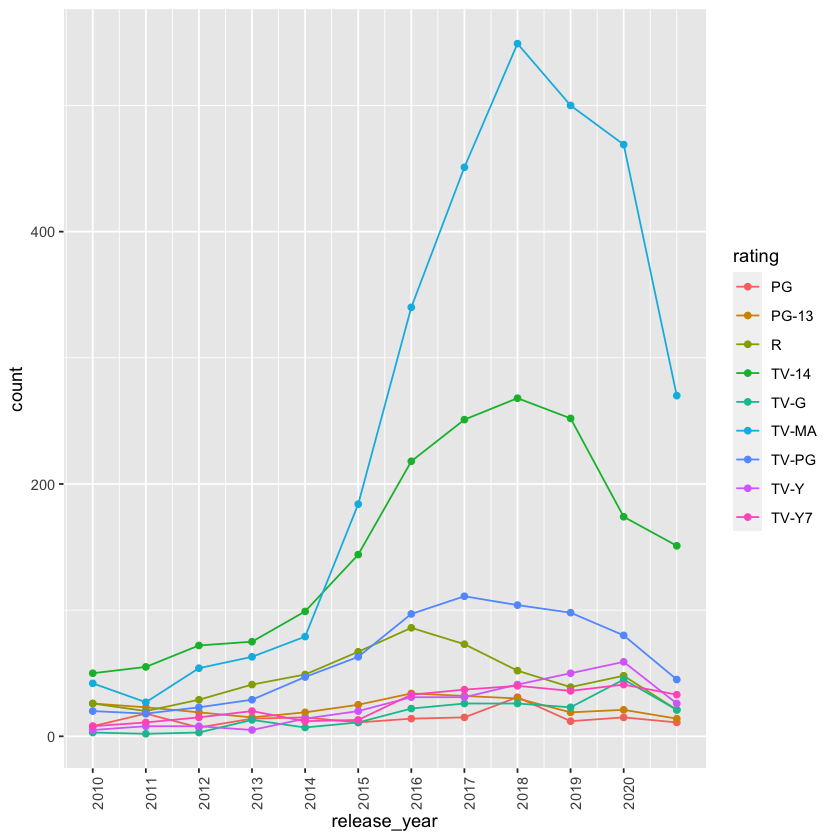

In [824]:
df1 %>% filter(rating %in%  r$rating) %>% group_by(rating, release_year) %>% summarise(count = n(), .groups='drop') %>% filter(release_year>=2010) %>%
filter(count >1) %>%
ggplot(aes(x=release_year, y=count, color=rating)) + geom_line()+geom_point()+ scale_x_continuous(breaks=seq(2010, 2020, 1)) + theme(axis.text.x = element_text(angle=90))

From 2015 to 2018, TV_MA(TV_Mature_Audience) was the rating type most film belong to, followed by TV_14 and TV_PG. Befre 2014, TV_14 is the favorite rating type.

The Rating trend and Listed_in trend are likely the same

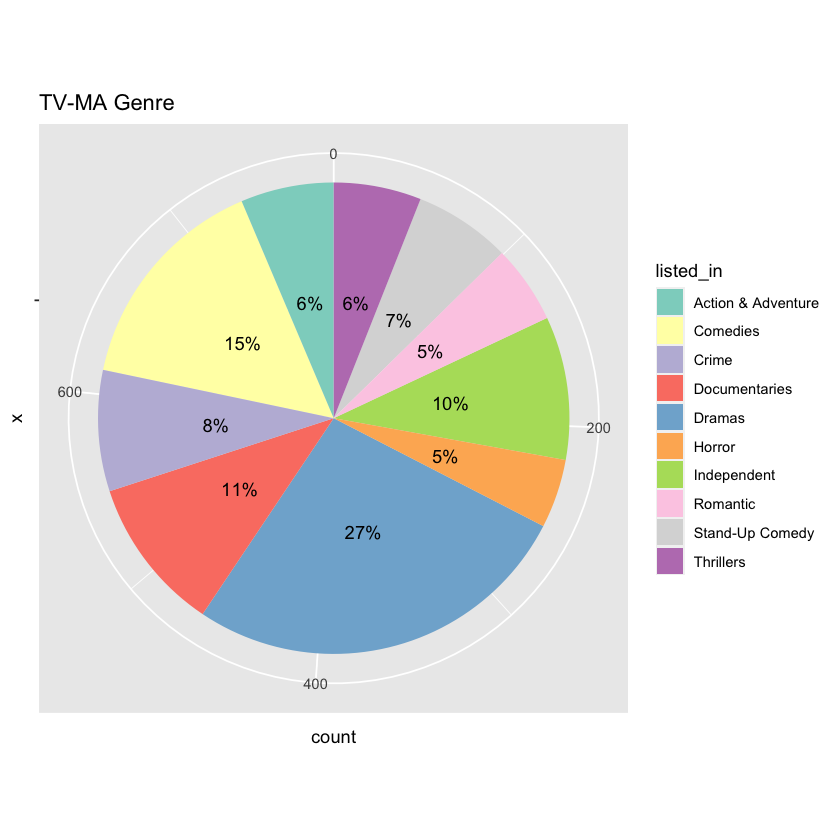

In [841]:
# df1 %>% filter(rating=='TV-MA' & release_year == '2018') %>% separate_rows(listed_in, sep=', ') %>% 
# mutate(listed_in = trimws(listed_in)) %>% group_by(listed_in) %>% summarise(count= n()) %>% arrange(desc(count)) %>%
# slice(2:11) %>% mutate(percen= paste0(round(count*100/sum(count),0), '%')) %>%
# ggplot(aes(x='', y=count, fill=listed_in)) + geom_bar(stat='identity') + coord_polar('y', start=0) + 
# geom_text(aes(label=percen), position = position_stack(vjust=0.5),col='black')+
# scale_fill_brewer(palette = "Set3") + labs(title='TV-MA Genre')

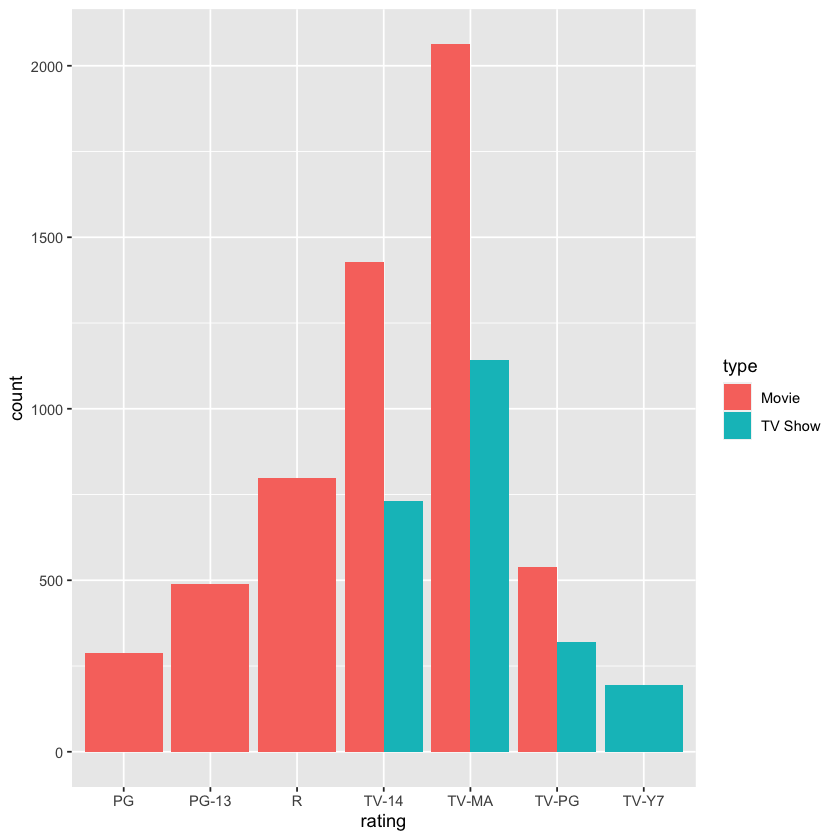

In [786]:
df1 %>% filter(!is.na(rating)) %>% group_by(rating, type)  %>% summarise(count = n(), .groups = 'drop') %>% arrange(desc(count)) %>%
slice(1:10) %>% ggplot(aes(x=rating, y=count, fill=type)) + geom_bar(stat='identity', position = "dodge")

AS you can see, both movie and TV show has TV_MA rating, which is for adult audients. 

## duration of movie

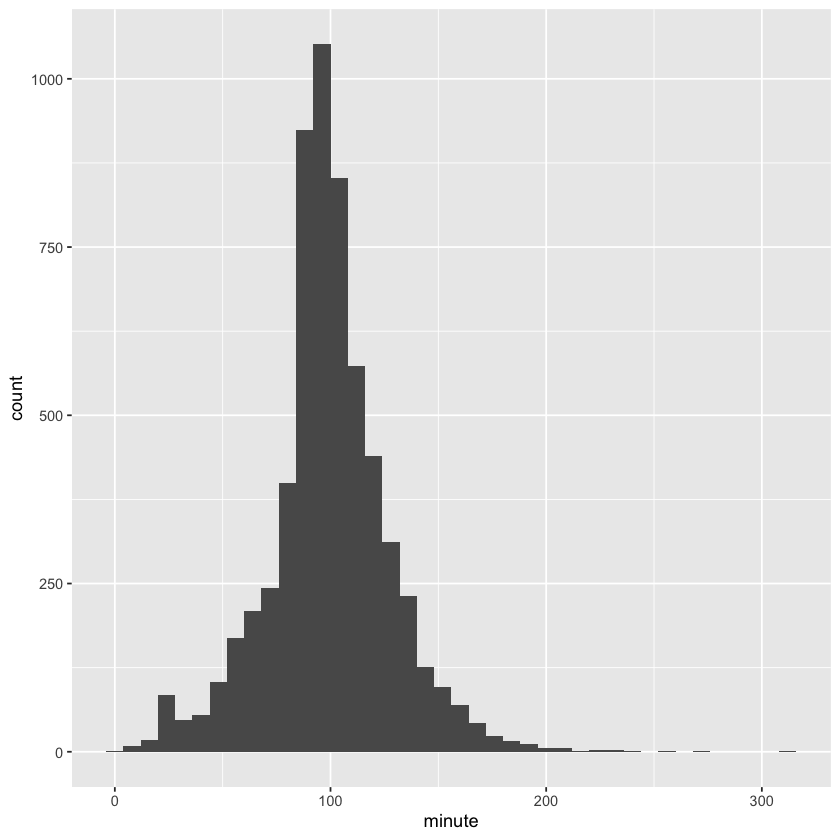

In [12]:
df1 %>% filter(type=='Movie' & minute!=-1) %>%
ggplot(aes(x=minute)) + geom_histogram(binwidth=8)

From the distribution, we can conclude that most movie'length range from 90-120 minutes

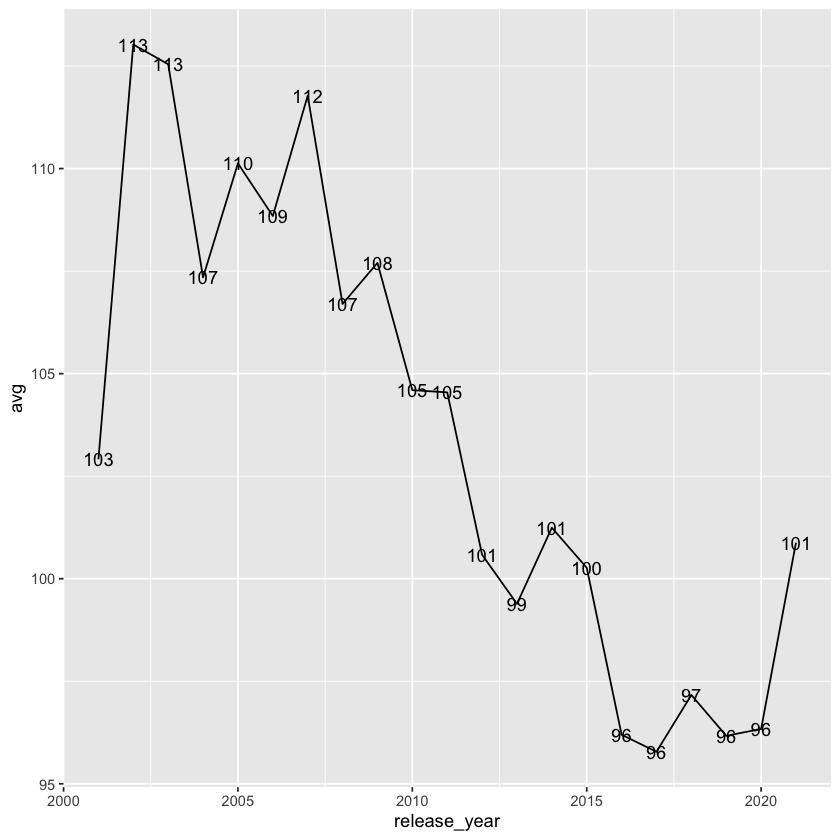

In [45]:
df1 %>% filter(type=='Movie' & minute!=-1) %>% group_by(release_year) %>%
filter(minute >40 & release_year>2000 & minute <160) %>%
summarise(avg = mean(minute)) %>% ggplot(aes(release_year, avg)) + geom_line() + 
geom_text(aes(label=round(avg)))

From the year 2000 to 2010, there is a fluctuation is duration of minute. From 2010 to 2013, the duration of movie decreased rapidly from 105 to 95 and stay around 90mins for a movie

In [85]:
d <- df1 %>% mutate(listed_in = trimws(listed_in)) %>% separate_rows(listed_in, sep=', ') %>%
filter(listed_in !='unknown' & listed_in !='International')%>% group_by(listed_in) %>%
summarise(count = n()) %>% arrange(desc(count)) %>% slice(1:10)
d

listed_in,count
<chr>,<int>
Dramas,2493
Comedies,1793
Documentaries,1263
Romantic,986
Action & Adventure,898
Independent,756
Dramas,695
Children & Family,641
Thrillers,577


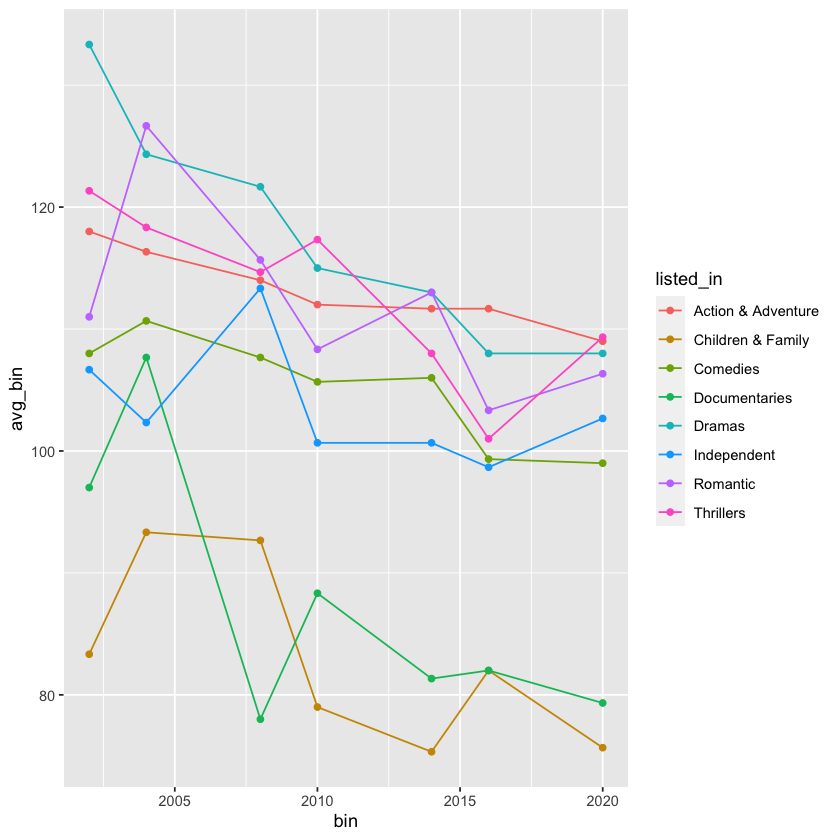

In [107]:
s <- seq(2000, 2023, by=3)
(df1 %>% separate_rows(listed_in, sep=', ') %>% 
mutate(listed_in = trimws(listed_in)) %>% filter(listed_in %in% d$listed_in & release_year >2000 & type=='Movie')%>%
group_by(listed_in, release_year) %>% summarise(avg = round(mean(minute)), .groups='drop')) %>% 
mutate(bin = cut(release_year, s, labels = sapply(1:(length(s)-1), function(i) round(mean(s[i:(i+1)]))))) %>% 
group_by(bin, listed_in) %>% 
summarise(avg_bin = mean(avg), .groups='drop') %>% mutate(bin = as.numeric(as.character(bin))) %>% 
ggplot(aes(x=bin, y=avg_bin, color= listed_in)) + geom_line() + geom_point()

In gereral, all movie genre time decresed overtime Documentaries and Children&Family Movie seem to have lowest amount of time(~80mins). While remained film fall betwwen 100-110 minute

## TV/Show season

In [23]:
tv_show <- df_clean %>%select(country, type, duration, rating, title) %>% filter(type =='TV Show') %>% drop_na() %>% mutate(duration_season = parse_number(duration))

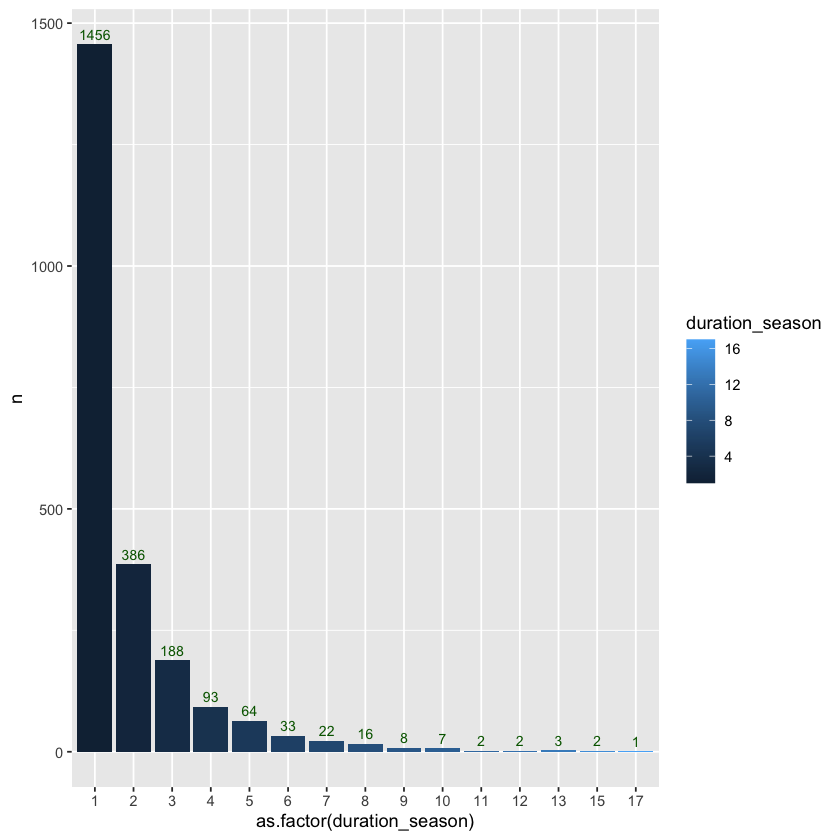

In [24]:
tv_show %>% count(duration_season) %>% ggplot(aes(x=as.factor(duration_season), y=n, label=n)) +
geom_col(aes(fill=duration_season)) + geom_text(vjust = -0.5, size = 3, col = "darkgreen")

Most tv-show only have one season